# Miscellaneous data analysis and simulation topics

Here we will explore some miscellaneous topics: taking Fourier transforms, solving differential equations, and storing and loading objects to and from file.

We will follow best practices and write all of our `import`s at the beginning of the notebook. This makes it easy for the user to see what packages are needed to run this notebook.

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## 1. Fourier transforms

Fourier transforms are a super important tool in science because they can separate out different frequencies from a signal. Let us generate two signals at different frequencies:

Text(0.5, 0, 'time')

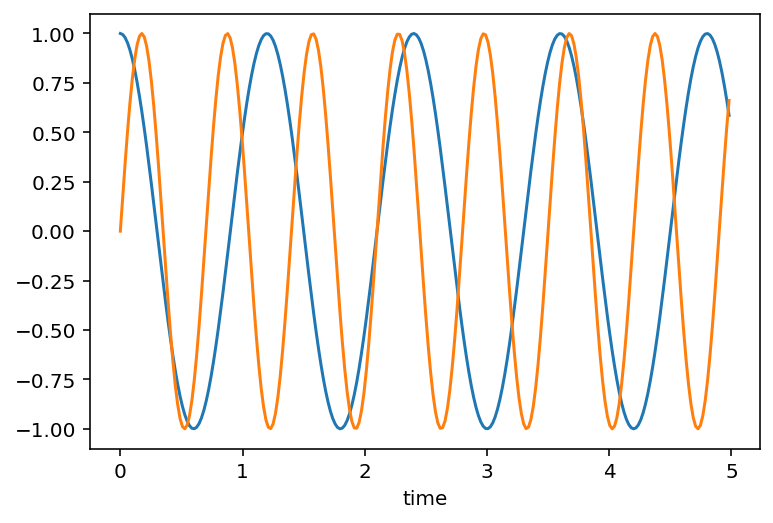

In [2]:
t_max = 5
t = np.linspace(0, t_max, 256, endpoint=False)

w1 = 2 * np.pi / 1.2
w2 = 2 * np.pi / 0.7

x1 = np.cos(w1 * t)
x2 = np.sin(w2 * t)

plt.plot(t, x1)
plt.plot(t, x2)

plt.xlabel("time")

Numpy can calculate the Discrete Fourier Transform (DFT) for us using a fast algorithm, usually known as the Fast Fourier Transform (FFT). We will not explain the Fourier transform in detail here, but this is one of the things that Wikipedia explains very well: [DFT](https://en.wikipedia.org/wiki/Discrete_Fourier_transform), [FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform). The thing to know is that the FFT of a signal of length $n$ is another length-$n$ vector, but this time *complex-valued*. The $k$th entry represents the complex coefficient of the complex oscillation with period $n / k$ – more precisely, it is the coefficient of the complex exponential $\exp(-2 \pi i k / n)$. When $k > n / 2$, *aliasing* occurs, such that index $k$ and index $n - k$ refer to the same oscillation, up to a complex-conjugate. If the original signal is real, the $n - k$th value of the FFT is equal to the complex conjugate of the $k$th value. We can see this in the absolute value of the FFT plotted below:

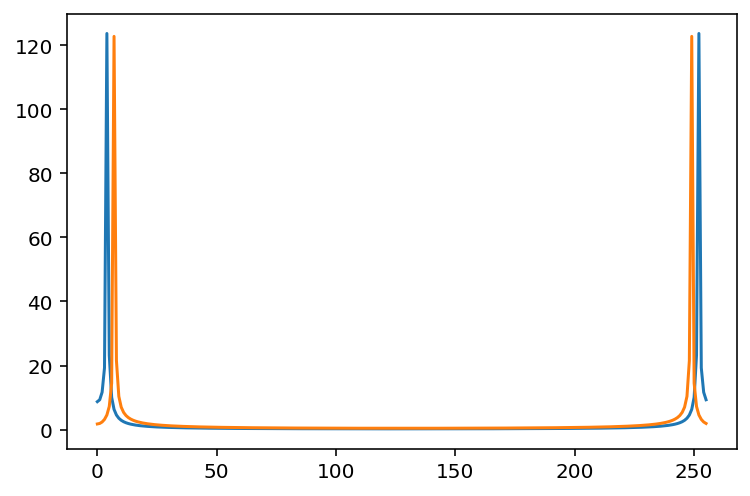

In [3]:
f1 = np.fft.fft(x1)
f2 = np.fft.fft(x2)

plt.plot(np.abs(f1))
plt.plot(np.abs(f2))

We can thus only show half of the FFT, since the other half is symmetric:

Text(0.5, 0, 'frequency')

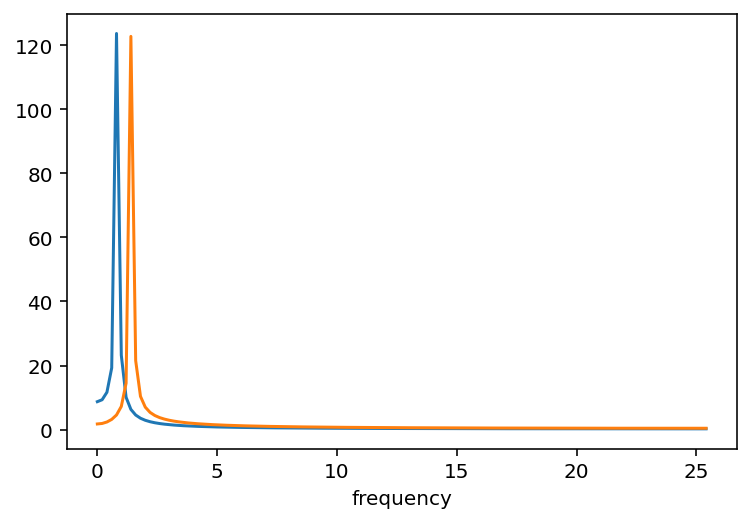

In [4]:
n = len(f1)
# // is integer division
half = (n + 1) // 2
plt.plot(np.arange(half) / t_max, np.abs(f1[:half]))
plt.plot(np.arange(half) / t_max, np.abs(f2[:half]))

plt.xlabel("frequency")

We also normalized the frequency axis above to match the time unit implied by our definition of `t` above.

Of course, picking out the frequency of a sinusoidal signal is not very impressive. The FFT can find the individual components even if we add up the signals:

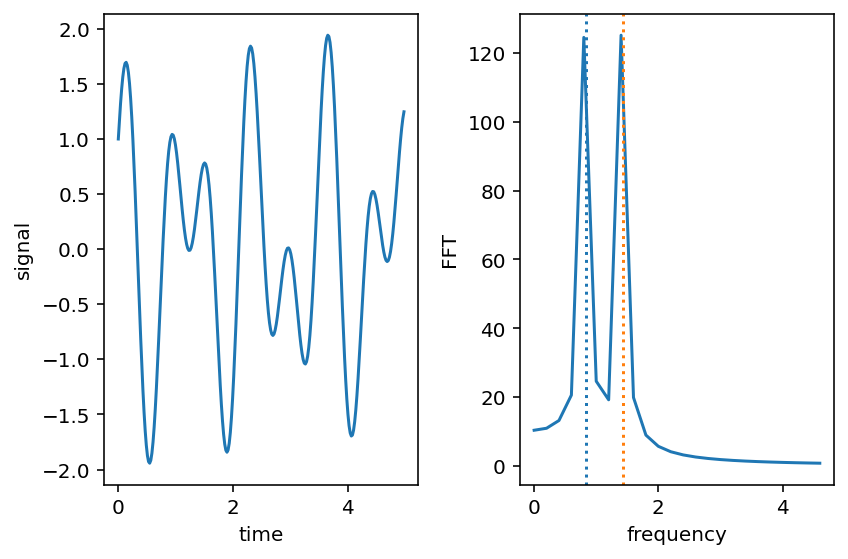

In [5]:
x = x1 + x2
f = np.fft.fft(x)

plt.subplot(121)
plt.plot(t, x)
plt.xlabel("time")
plt.ylabel("signal")

plt.subplot(122)
sub_range = 24
plt.plot(np.arange(sub_range) / t_max, np.abs(f[:sub_range]))
plt.axvline(w1 / (2 * np.pi), ls=":", c="C0")
plt.axvline(w2 / (2 * np.pi), ls=":", c="C1")
plt.xlabel("frequency")
plt.ylabel("FFT")

# this adjusts the plots to avoid overlapping
plt.tight_layout()

In the plot above, we zoomed into the lower-frequency part of the FFT spectrum, and indicated the known frequencies of the two signals using dotted lines. Note how the FFT correctly identified that the signal `x` is composed of two different frequencies, and identified these frequencies.

## 2. Differential equations

## 3. "Pickling" data

## 4. Links to more advanced topics